In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def read_csv_from_zip(file_path):
    with zipfile.ZipFile(file_path, "r") as zip_file:
        # Assuming there's only one file in the ZIP archive
        csv_file_name = zip_file.namelist()[0]
        extracted_path = zip_file.extract(csv_file_name, path="/kaggle/working")
        
    data = pd.read_csv(extracted_path)
    return data


In [2]:
file_path = "/kaggle/input/instacart-market-basket-analysis/departments.csv.zip"
data_departments = read_csv_from_zip(file_path)
data_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [3]:
file_path = "/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip"
data_order_products = read_csv_from_zip(file_path)
data_order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [4]:
file_path = "/kaggle/input/instacart-market-basket-analysis/products.csv.zip"
data_products = read_csv_from_zip(file_path)
data_products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [5]:
file_path = "/kaggle/input/instacart-market-basket-analysis/orders.csv.zip"
data_orders = read_csv_from_zip(file_path)
data_orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [6]:
file_path = "/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip"
data_aisles = read_csv_from_zip(file_path)
data_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


# Merge Data



In [7]:
df_order_products = pd.merge(data_order_products, data_products, on='product_id', how='left')
df_order_products = pd.merge(df_order_products, data_aisles, on='aisle_id', how='left')
df_order_products = pd.merge(df_order_products, data_orders, on='order_id', how='left')
df_order_products = pd.merge(df_order_products, data_departments, on='department_id', how='left')
df_order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,202279,prior,3,5,9,8.0,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,202279,prior,3,5,9,8.0,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,202279,prior,3,5,9,8.0,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,202279,prior,3,5,9,8.0,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,202279,prior,3,5,9,8.0,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,202279,prior,3,5,9,8.0,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,202279,prior,3,5,9,8.0,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,202279,prior,3,5,9,8.0,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,202279,prior,3,5,9,8.0,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,205970,prior,16,5,17,12.0,dairy eggs


# Frequency count of each unique value in the 'product_name' column

In [8]:
product_frequency_count = df_order_products['product_name'].value_counts()

In [9]:
product_frequency_count= product_frequency_count.reset_index()

product_frequency_count.head(5)

,index,product_name
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


# Top 10 rows, showing the products with the highest frequency counts.

In [10]:
top_10_product_frequency_count = product_frequency_count.head(10)
top_10_product_frequency_count.columns = ['product_name', 'frequency_count']
top_10_product_frequency_count.head(10)

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


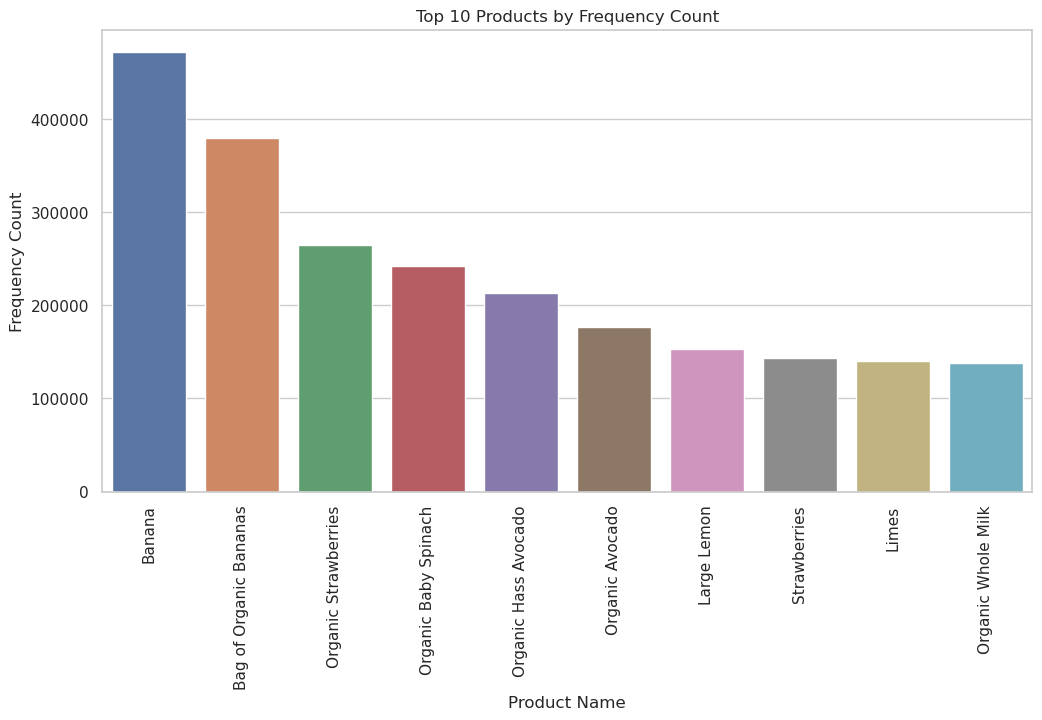

In [11]:

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_product_frequency_count, x='product_name', y='frequency_count')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Frequency Count')
plt.title('Top 10 Products by Frequency Count')

# Display the plot
plt.show()


# countplot Represent the department wise distribution.

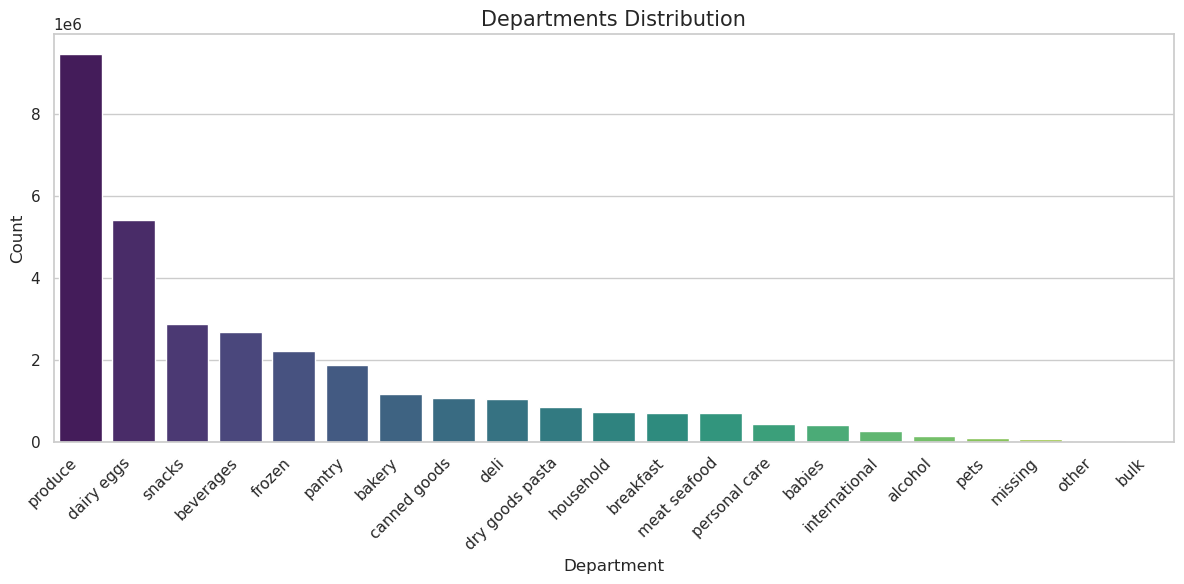

In [12]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df_order_products, x='department', order=df_order_products['department'].value_counts().index, palette='viridis')

plt.title("Departments Distribution", fontsize=15)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  

plt.show()


# Reorder Ratio of Products

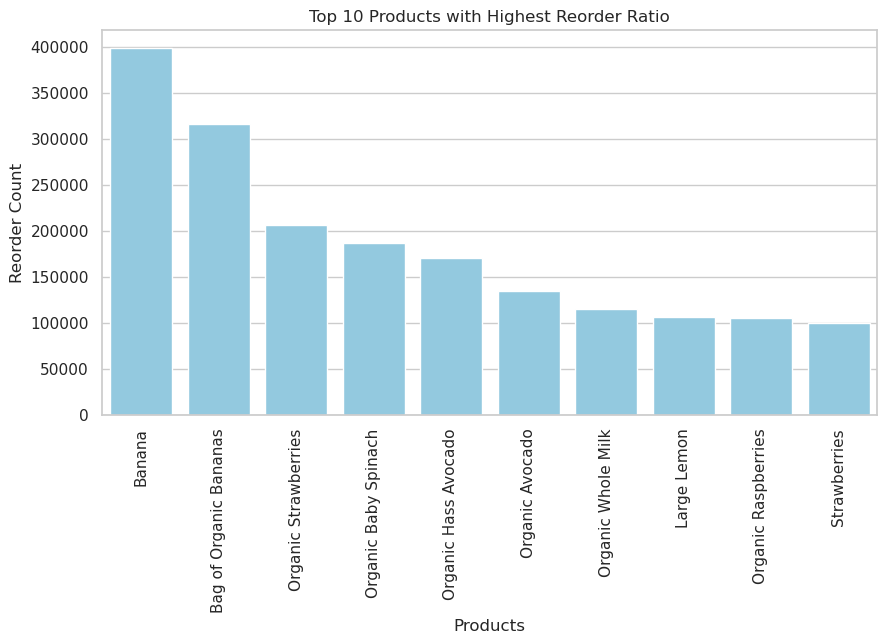

In [13]:
top_products = df_order_products[df_order_products['reordered']==1]['product_name'].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, color='skyblue')
plt.title('Top 10 Products with Highest Reorder Ratio')
plt.xlabel('Products')
plt.ylabel('Reorder Count')
plt.xticks(rotation='vertical')
plt.show()

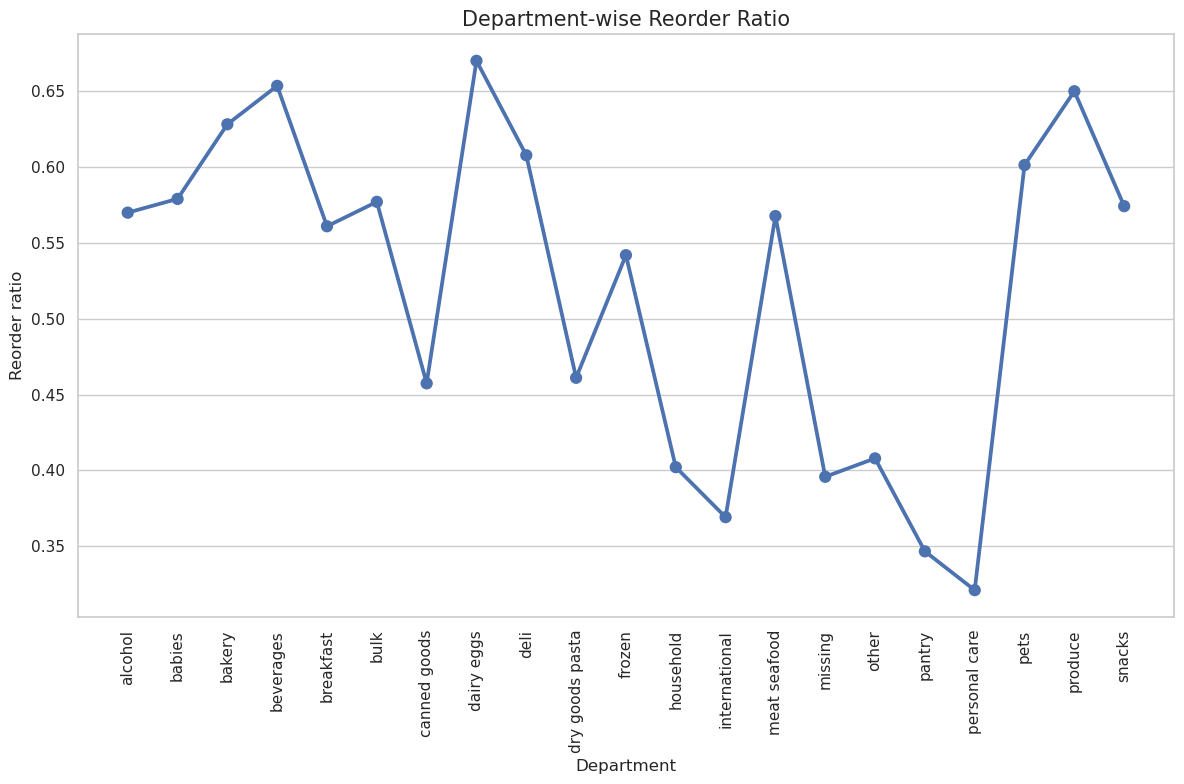

In [14]:
grouped_df = df_order_products.groupby(["department"])["reordered"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.pointplot(x='department', y='reordered', data=grouped_df, color='b')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department-wise Reorder Ratio", fontsize=15)
plt.xticks(rotation='vertical')

# Adjust transparency of the plot elements
plt.plot(grouped_df['department'], grouped_df['reordered'], 'bo-', alpha=0.8)

plt.tight_layout()
plt.show()

# Product Sales by Department

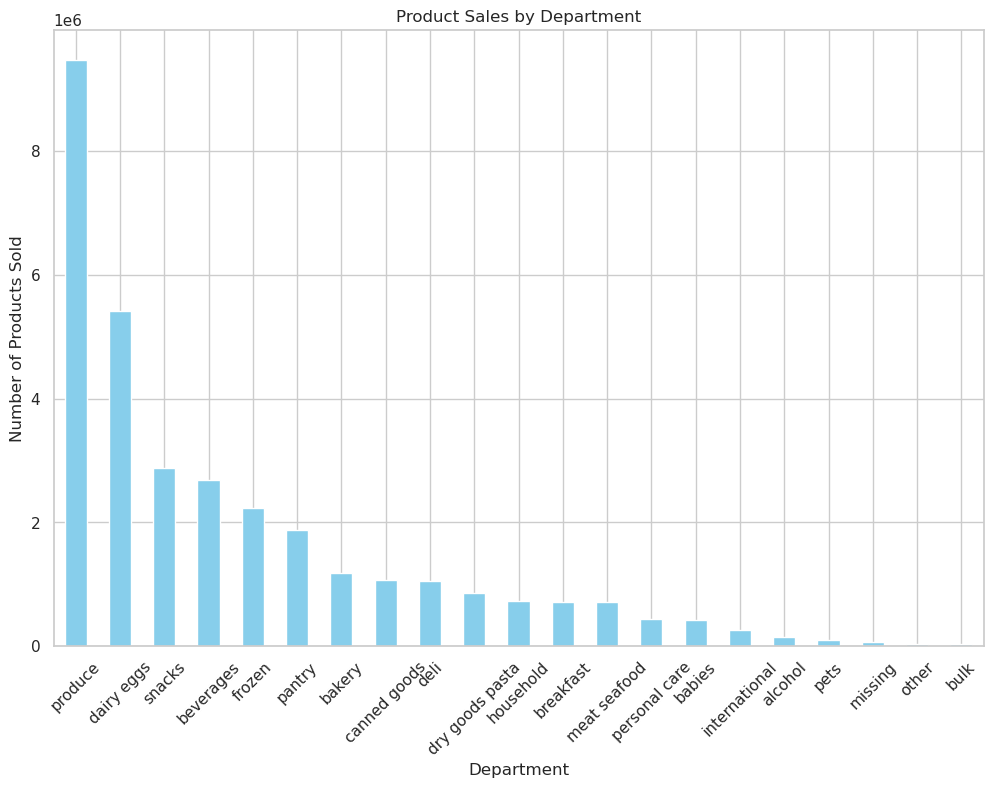

In [15]:
plt.figure(figsize=(12,8))
df_order_products['department'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Product Sales by Department')
plt.xlabel('Department')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()


* Bars: The bars represent the mean reorder ratio for each department. The height of each bar indicates the average proportion of items reordered in that particular department. The bars provide a visual comparison between departments in terms of their reorder ratio.

* Error bars: The error bars are represented as vertical lines above and below each bar. They indicate the variability or uncertainty associated with the mean reorder ratio for each department. The length of the error bars represents the magnitude of the variability. The error bars provide insights into the confidence or reliability of the mean reorder ratio estimate.

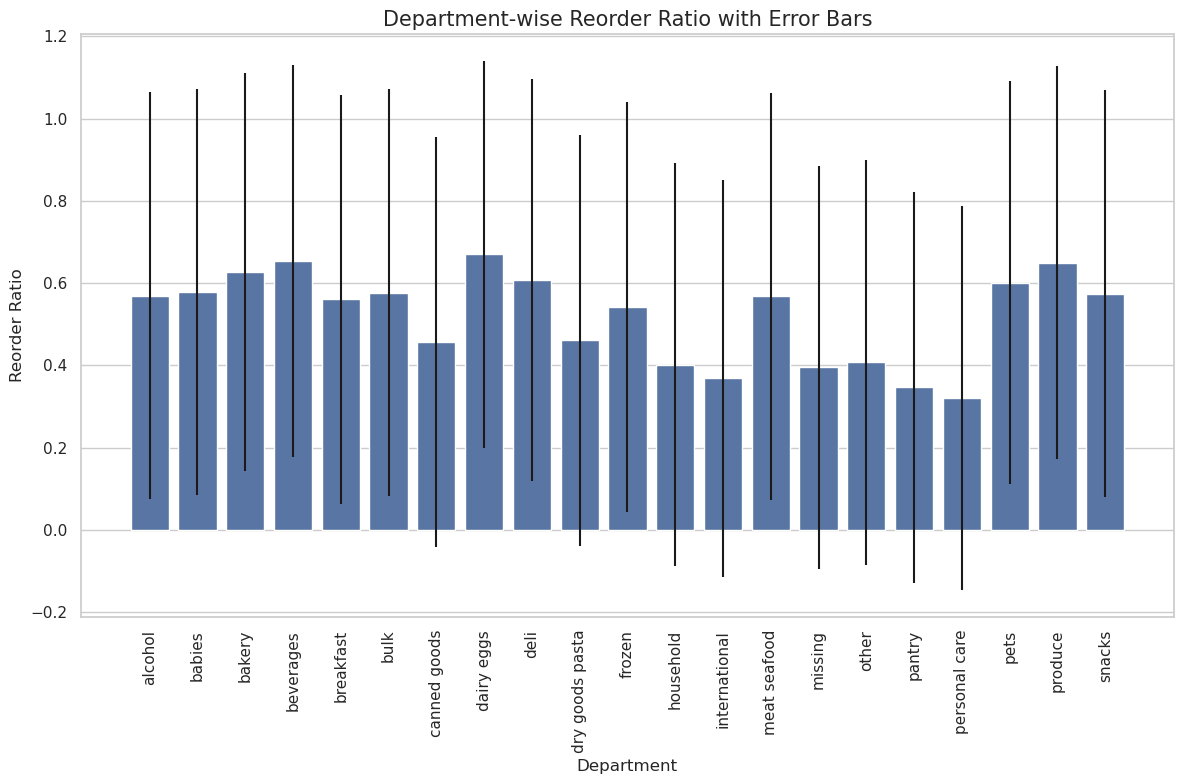

In [16]:
grouped_df = df_order_products.groupby(["department"])["reordered"].mean().reset_index()
grouped_df['reordered_std'] = df_order_products.groupby(["department"])["reordered"].std().reset_index()["reordered"]

plt.figure(figsize=(12, 8))
sns.barplot(x='department', y='reordered', data=grouped_df, color='b')
plt.errorbar(x=grouped_df['department'], y=grouped_df['reordered'], yerr=grouped_df['reordered_std'], fmt='none', color='k')
plt.ylabel('Reorder Ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title('Department-wise Reorder Ratio with Error Bars', fontsize=15)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

# Busiest Days of The Week

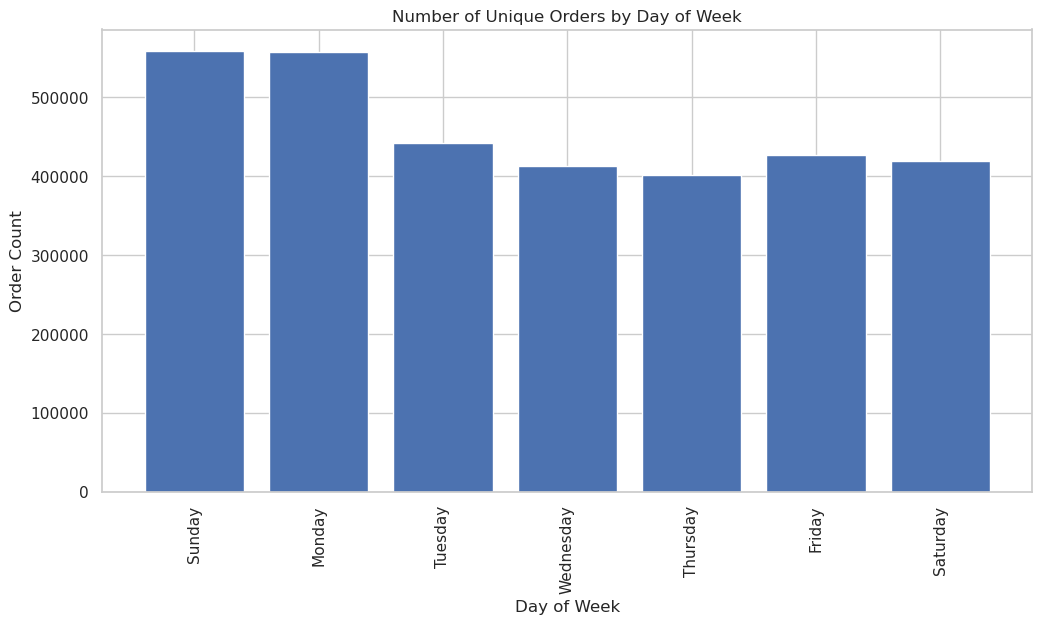

In [17]:
weekday_names = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Calculate the number of unique orders for each day of the week
orders_per_day = df_order_products.groupby('order_dow')['order_id'].apply(lambda x: len(x.unique()))

# Map numerical day of the week codes to week names
weekdays = [weekday_names[day] for day in orders_per_day.index]

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(weekdays, orders_per_day)
plt.xticks(rotation='vertical')
plt.ylabel('Order Count')
plt.xlabel('Day of Week')
plt.title('Number of Unique Orders by Day of Week')
plt.show()


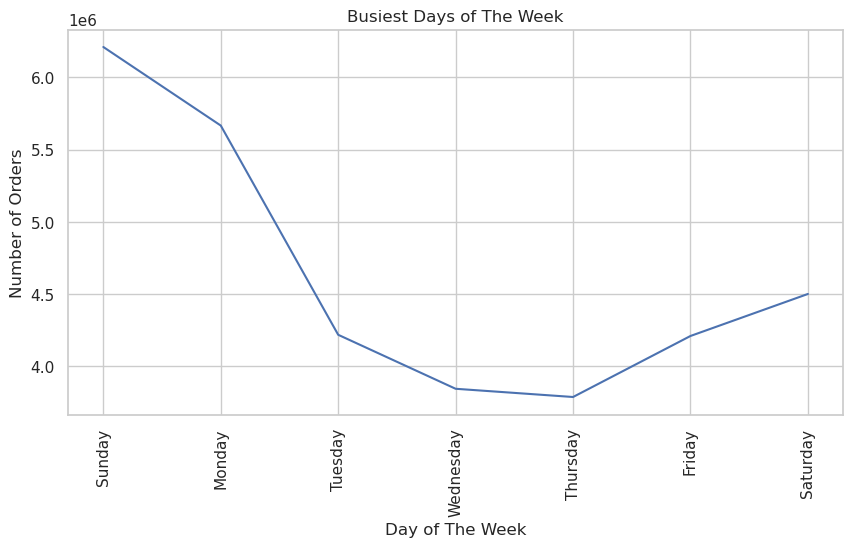

In [18]:
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
busiest_days = df_order_products['order_dow'].map(weekday_map).value_counts().loc[weekday_map.values()]

# Visualization
plt.figure(figsize=(10,5))
sns.lineplot(x=busiest_days.index, y=busiest_days.values)
plt.title('Busiest Days of The Week')
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Day of The Week', fontsize=12)
plt.xticks(rotation='vertical')  # Add this line if the weekday labels are overlapping
plt.show()


# Order Distribution Across the Day

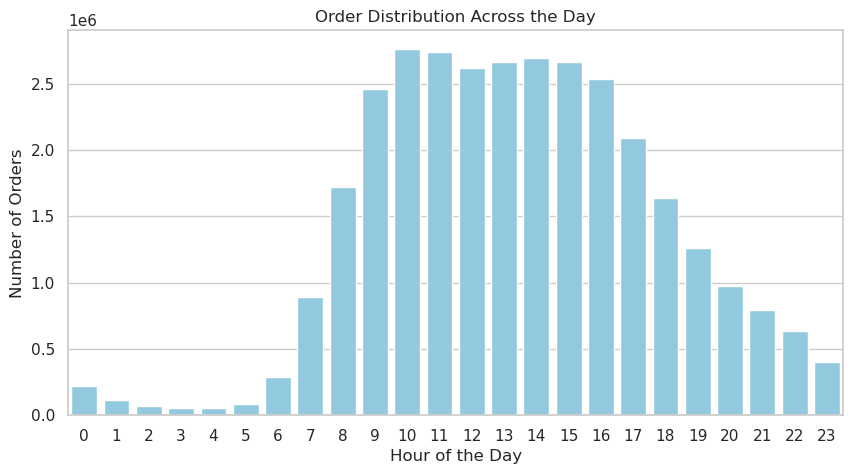

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day', data=df_order_products, color='skyblue')
plt.title('Order Distribution Across the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

# Time intervals between consecutive orders.

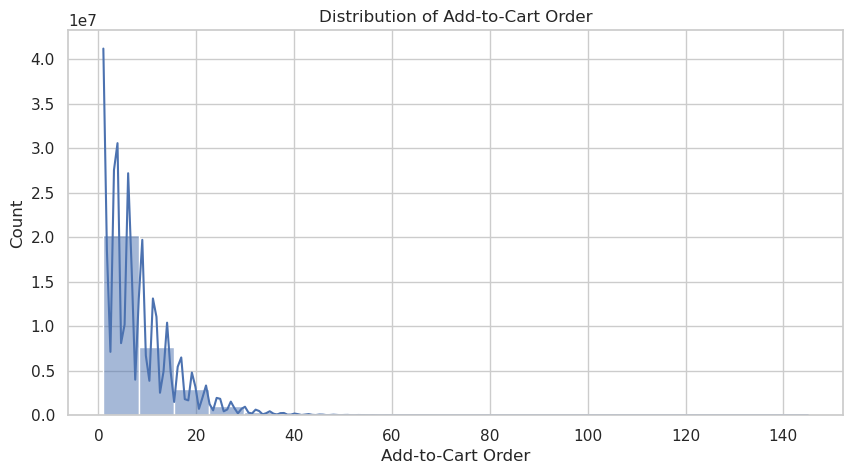

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_order_products, x='add_to_cart_order', bins=20, kde=True)
plt.title('Distribution of Add-to-Cart Order')
plt.xlabel('Add-to-Cart Order')
plt.ylabel('Count')
plt.show()


* The graph displayed is a set of bar plots, where each plot represents the distribution of products across different aisles within each department.

* The graph provides insights into the volume of products within each department and how they are distributed across various aisles.

* The graph allows to compare the distribution of products across aisles within each department. By examining the heights of the bars, we can identify the dominant aisles within a department based on the product count.


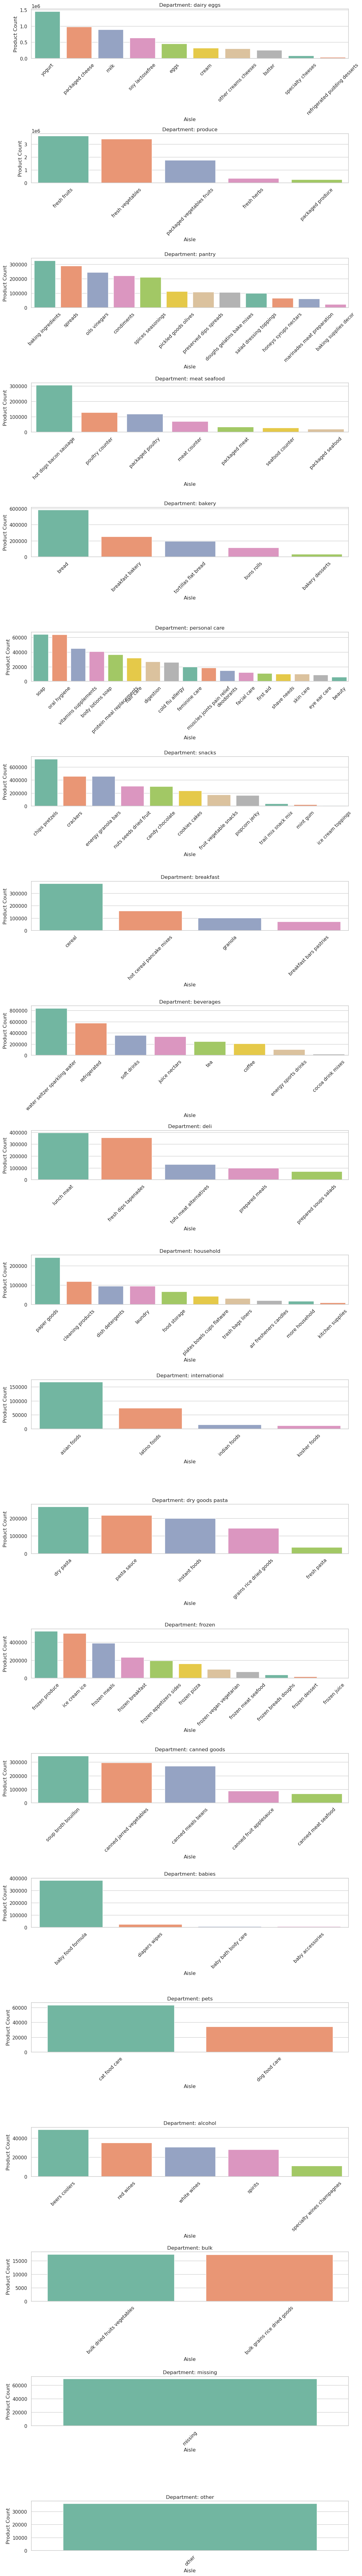

In [21]:
colors = sns.color_palette("Set2")  # Choose a different color palette

# Get the unique departments
unique_departments = df_order_products['department'].unique()
num_rows = len(unique_departments)

# Plot departments volume, split by aisles
fig, axes = plt.subplots(num_rows, 1, figsize=(12, num_rows*4))
for i, department in enumerate(unique_departments):
    ax = axes[i]
    department_df = df_order_products[df_order_products['department'] == department]
    aisle_counts = department_df['aisle'].value_counts().sort_values(ascending=False)
    sns.barplot(x=aisle_counts.index, y=aisle_counts.values, ax=ax, palette=colors)
    ax.set_title(f'Department: {department}')
    ax.set_xlabel('Aisle')
    ax.set_ylabel('Product Count')
    ax.set_xticklabels(aisle_counts.index, rotation=45)
plt.tight_layout()

# Display the plots
plt.show()
